In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('/content/Main_Dataset.csv')

In [6]:
data.head()

,Year-Month,ME1 BM1,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,ME10 BM10
0,200001,24.3415,19.2668,19.3539,18.0171,10.7235,7.8678,9.0232,9.8741,12.3248,...,-5.5621,-2.8379,-3.6561,-0.7318,-7.2878,-4.2195,-6.5547,-99.99,-4.2329,-99.99
1,200002,33.0060,23.2243,33.2371,22.7635,15.7557,14.5257,18.2750,13.9346,17.2925,...,-2.3065,-6.1111,-8.2477,-6.9776,-8.2009,-11.9967,-12.6404,-99.99,-22.7700,-99.99
2,200003,-3.1811,-2.0866,-4.9578,-4.1287,-2.3156,-4.0161,-0.0413,-1.3999,-1.3516,...,9.4223,12.1193,11.9121,10.8357,10.8593,20.7304,7.8889,-99.99,34.9544,-99.99
3,200004,-27.4124,-21.7108,-22.4053,-15.5889,-12.5648,-6.8600,-9.6182,-8.2997,-8.8369,...,-1.3529,0.4894,-2.2906,0.1970,-2.2891,5.5517,3.5154,-99.99,4.6396,-99.99
4,200005,-14.9946,-12.5815,-11.4001,-8.1788,-7.8468,-6.2557,-7.8018,-4.4337,-5.6034,...,-0.1866,1.2491,3.4483,2.9486,3.4404,8.3442,5.4909,-99.99,15.3348,-99.99


In [30]:
data.isnull().sum()

,0
Year-Month,0
ME1 BM1,0
ME1 BM2,0
ME1 BM3,0
ME1 BM4,0
...,...
ME10 BM6,0
ME10 BM7,0
ME10 BM8,0
ME10 BM9,0


In [31]:
data.dtypes

,0
Year-Month,int64
ME1 BM1,float64
ME1 BM2,float64
ME1 BM3,float64
ME1 BM4,float64
...,...
ME10 BM6,float64
ME10 BM7,float64
ME10 BM8,float64
ME10 BM9,float64


In [7]:
data.shape

(288, 101)

###Define The Necessary Methods For Training

In [8]:
#Method to select the require 12 rows out of the dataframe
def get_required_rows(data,iter):
  startindex,endindex=12*(iter-1),12*(iter-1)+12
  newdata=data.iloc[startindex:endindex,:]
  return newdata

In [8]:
#get_required_rows(data,1)

In [36]:
#Method used to compute the cummulative return on every columns over the 12 months/1 year
def get_cummulative_return(data):
  cummulative_return_rate={} #List to store the returns after 1 year on everay stock in every sector
  new_data=data.drop('Year-Month',axis=1)
  for col in new_data.columns:   #Compute for every stock in each sector
    res=0
    returns=1
    for vals in data[col]:       #Access the 12 row values under each column
      returns*=(1+(vals/100))      #Product (1+rate/100) over 12 years
    returns-=1
    returns*=100                 #[Product (1+rate/100) -1]*100
    cummulative_return_rate[col]=returns   #Append the cummulative returns to List
  return cummulative_return_rate

#year_data=get_required_rows(data,1)
#yearly_return=get_cummulative_return(year_data)
#print(yearly_return)

In [37]:
#Method used to compute the total return after 1 year on investment
def compute_year_return(c_return_rates,investment):
  return sum([c_return_rates[stock]*investment[stock] for stock in investment.keys()])

###The Update Rule
 - The update rule tries to increase the weight/investment on those stocks whose expected return (investment[i]*reward) is greater than the total annual return and vice-versa.
 - It will further use the relative return rate as an amplification factor


In [29]:
#Update Formula For each Reward
def update_investment_vector(c_return_rates,investment,reward,alpha=0.01):
  #Calculate the relative return rate
  total_return=sum(c_return_rates.values())
  rel_return=dict([(k,v/total_return) for k,v in c_return_rates.items()])

  #Update the investment vector
  for k in investment.keys():
    investment[k]+=alpha*(investment[k]*reward-reward)*rel_return[k]
    #investment[k]+=alpha*(reward-investment[k]*reward)*rel_return[k]

  total_inv=sum(list(investment.values()))

  #Normalize
  new_inv=dict([(k,investment[k]/total_inv) for k in investment.keys()])

  return new_inv


###Sharp Ratio Based Yearly Return Calculation Using Efficient Frontier

In [38]:
!pip install PyPortfolioOpt

In [39]:
#from pypfopt import EfficientFrontier, risk_models, expected_returns
#
#def Get_Yearly_Sharp_Ratio_Return(data,investment):
#  year_data=data.copy()
#  year_data=year_data.drop('Year-Month',axis=1)
#  #Clip the outliers from the data
#  #Q1=year_data.quantile(0.25)
#  #Q3=year_data.quantile(0.75)
#  #IQR=Q3-Q1
#  #lower_bound=Q1-1.5*(IQR)
#  #upper_bound=Q3+1.5*(IQR)
#  #capped_data=year_data.clip(lower=lower_bound,upper=upper_bound,axis=1)
#
#
#  #Calculate the expected return based on the historical data
#  #print(data.shape)
#  #mu=expected_returns.mean_historical_return(data) #Compute the mean vector of the previous returns for each stock
#  mu=year_data.mean(skipna=False)
#  S = risk_models.CovarianceShrinkage(year_data).ledoit_wolf() #CovarianceShrinkage risk model used to stabilize the covariance matrix through shrinkage
#
#  ef=EfficientFrontier(mu,S)   #Create the efficient frontier object
#  weights=ef.max_sharpe()      #Get the weights that will maximize the sharp ratio
#
#  cleaned_weights = ef.clean_weights()  # Clean the weights for readability
#
#  #print(cleaned_weights)
#  #performance = ef.portfolio_performance(verbose=True)  # Get the expected return, volatility, and Sharpe ratio for the optimized portfolio
#
#  #Calculate the sharp ration based return
#  final_return=sum([investment[k]*weights[k] for k in investment.keys()])
#
#  return final_return

#yearly_return=year_data.drop('Year-Month',axis=1)
#investment=dict([(col,1/100) for col in yearly_return])
#Get_Yearly_Sharp_Ratio_Return(year_data,investment)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, risk_models, expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

def Get_Yearly_Sharp_Ratio_Return(year_data,investment):
  data_m=year_data.drop('Year-Month',axis=1)
  data_m=data_m*(1/100)
  mean=np.mean(data_m,axis=0)
  cov=np.cov(data_m,rowvar=False)
  ef=EfficientFrontier(mean,cov)
  weights=ef.max_sharpe(risk_free_rate=-5)
  w=np.array(list(weights.values()))
  inv=list(investment.values())
  return np.dot(w,inv)*100*12

#year_data=get_required_rows(data,1)
#investment=dict([(col,1/100) for col in data.drop('Year-Month',axis=1).columns])
#Get_Yearly_Sharp_Ratio_Return(year_data,investment)

###Training Iterations

In [51]:
def train(investment,data,train_years=20):
  S_Return=[] #List used to store the sharp ratio return
  C_Return=[] #List used to store our yearly returns
  Reward=[] #List Used to store the reward over the period of time
  #Fetch the yearly data for 20 years and run the loop
  for i in range(1,train_years+1):
    year_data=get_required_rows(data,i) #Fetch the data for ith year
    c_return=get_cummulative_return(year_data) #Get the cummulative return for that years data
    yearend_return=compute_year_return(c_return,investment) #Fetch the year_end_return
    sharp_ratio_return=Get_Yearly_Sharp_Ratio_Return(year_data,investment) #Fetch the sharp ratio return
    reward=-abs(sharp_ratio_return-yearend_return)   #Fetch the reward
    investment=update_investment_vector(c_return,investment,reward)  #Update the investment vector
    S_Return.append(sharp_ratio_return)
    C_Return.append(yearend_return)
    Reward.append(reward)

  return S_Return,C_Return,Reward,investment

<ipython-input-58-83cf481bfcd2>:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


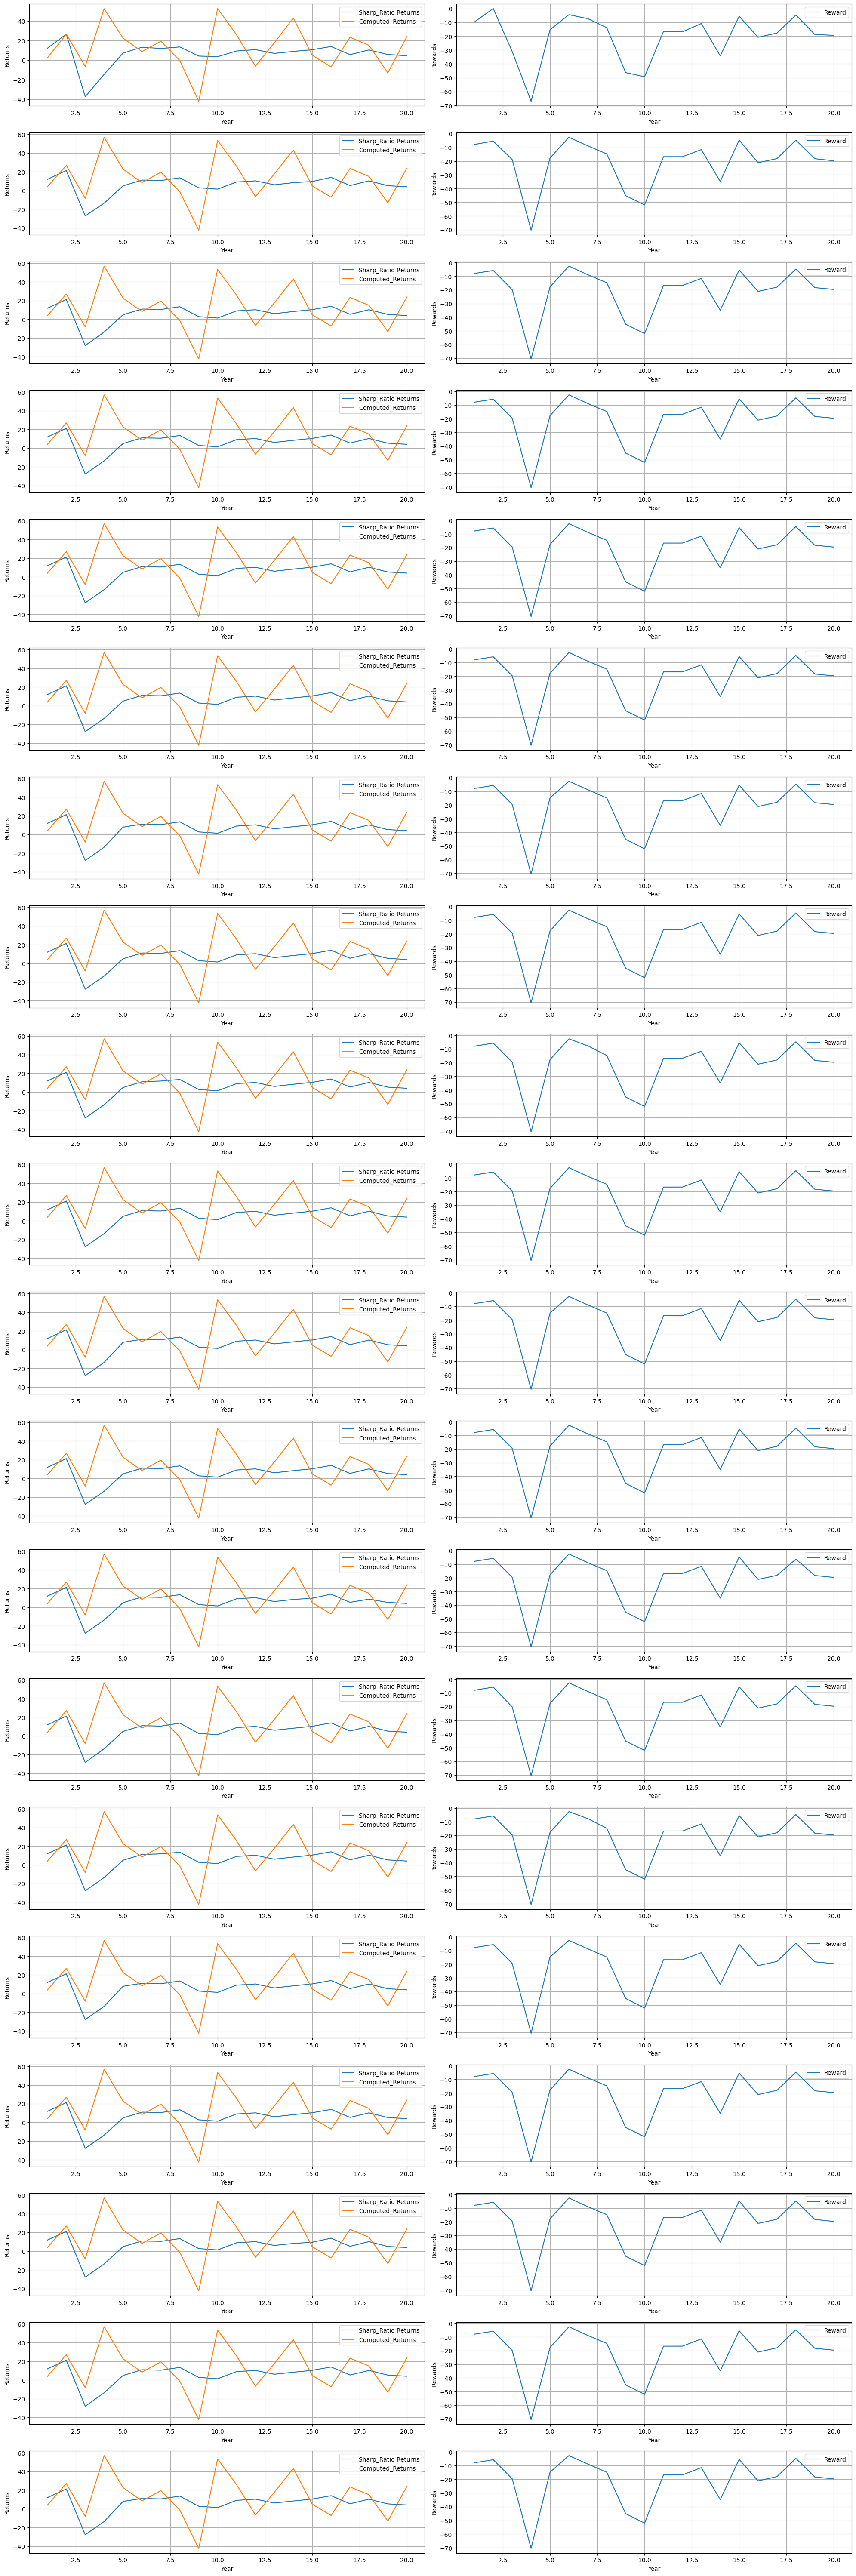

In [58]:
def Batch_Train(epoch,investment):
  fig,axes=plt.subplots(nrows=epoch, ncols=2, figsize=(20, 3 * epoch), constrained_layout=True)
  for e in range(epoch):
    S_Return,C_Return,Reward,investment=train(investment,data)
    axes[e][0].plot([(i+1) for i in range(20)],S_Return,label="Sharp_Ratio Returns")
    axes[e][0].plot([(i+1) for i in range(20)],C_Return,label="Computed_Returns")
    axes[e][1].plot([(i+1) for i in range(20)],Reward,label="Reward")
    axes[e][0].set_xlabel("Year")
    axes[e][0].set_ylabel("Returns")
    axes[e][1].set_xlabel("Year")
    axes[e][1].set_ylabel("Rewards")
    axes[e][0].grid(True)
    axes[e][1].grid(True)
    axes[e][0].legend()
    axes[e][1].legend()
  plt.tight_layout()
  plt.show()

investment = dict([(col, 1/100) for col in data.drop('Year-Month', axis=1).columns])
Batch_Train(20,investment)

In [ ]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#from pypfopt import EfficientFrontier, risk_models, expected_returns
#from pypfopt.efficient_frontier import EfficientFrontier
#
#df=pd.read_csv(r"........Project\data_modified.csv")
##creating 3D array to store the return rates of 100 stocks for 12 months over a period of 20 years
#
#data=np.zeros((12,98,20))
#for i in range(20):
#    data[:,:,i]=df.iloc[12*i:12*(i+1),1:].values*(1/100)
#
#
#
##Year wise Sharpe Ratio Return rates
#
#rates=[0]*20
#for i in range(20):
#    data_m=data[:,:,i]
#    mean=np.mean(data_m,axis=0)
#    cov=np.cov(data_m,rowvar=False)
#    ef=EfficientFrontier(mean,cov)
#    weights=ef.max_sharpe(risk_free_rate=-5) #We can play with this risk_free_return
#    w=np.array(list(weights.values()))
#    rates[i]=np.dot(mean.T,w)*100
#
#
#
#plt.plot(rates)
#plt.show()